In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import ssl


In [4]:
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
X

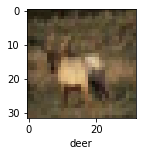

In [10]:
plot_sample(X_train, y_train, 3)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    #ann/dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

2022-01-13 20:56:30.445977: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4820 - accuracy: 0.4665
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1286 - accuracy: 0.6046
Epoch 3/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0009 - accuracy: 0.6510
Epoch 4/5
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9231 - accuracy: 0.6782
Epoch 5/5
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8619 - accuracy: 0.6977


In [26]:
y_pred = cnn.predict(X_test)

In [27]:
y_pred[:5]

array([[2.20684637e-03, 6.79396835e-05, 2.24221265e-03, 8.92032325e-01,
        3.17014892e-05, 9.15377140e-02, 1.28620886e-03, 4.45899612e-04,
        1.00172246e-02, 1.31894310e-04],
       [3.16360332e-02, 3.53641421e-01, 1.93964021e-04, 1.69915802e-05,
        2.49920049e-06, 1.48947365e-07, 1.57803612e-07, 9.00441410e-06,
        6.12187505e-01, 2.31227255e-03],
       [1.01961112e-02, 9.85130891e-02, 5.95928449e-03, 7.53934355e-03,
        3.01256659e-04, 4.07196581e-04, 2.74536520e-04, 2.22842908e-03,
        8.67721021e-01, 6.85973885e-03],
       [7.58347929e-01, 7.32208416e-02, 3.75010818e-02, 2.39289738e-03,
        1.91178441e-03, 8.11887949e-05, 1.49730622e-04, 1.16704160e-03,
        1.22965537e-01, 2.26191618e-03],
       [1.35735114e-04, 4.52760316e-04, 1.23916894e-01, 1.31994948e-01,
        2.87969887e-01, 4.01220880e-02, 4.13967967e-01, 1.13864313e-03,
        2.21966111e-04, 7.91959465e-05]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [29]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [30]:
def predict_this(index):
    plot_sample(X_test, y_test, index)
    print(classes[y_classes[index]])

dog


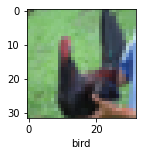

In [37]:
predict_this(25)